In [1]:
# necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Loading our new table
## [loading player_valuation table]

In [2]:
df_player_valuation = pd.read_csv('/Users/kishohars/Projects/football_valuation_project/data_raw/dataset/player_valuations.csv')
players = pd.read_csv('/Users/kishohars/Projects/football_valuation_project/data_raw/dataset/players.csv')

In [3]:
# Convert date_of_birth to datetime
players['date_of_birth'] = pd.to_datetime(players['date_of_birth'], errors='coerce')

def calculate_age(born):
  today = datetime.today()
  return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

players['age'] = players['date_of_birth'].apply(calculate_age)

players.head()

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur,age
0,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,184.0,NaN,ASBW Sport Marketing,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0,47.0
1,26,Roman,Weidenfeller,Roman Weidenfeller,2017,16,roman-weidenfeller,Germany,Diez,Germany,...,190.0,NaN,Neubauer 13 GmbH,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/roman-weidenfe...,L1,Borussia Dortmund,750000.0,8000000.0,45.0
2,65,Dimitar,Berbatov,Dimitar Berbatov,2015,1091,dimitar-berbatov,Bulgaria,Blagoevgrad,Bulgaria,...,NaN,NaN,CSKA-AS-23 Ltd.,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/dimitar-berbat...,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,1000000.0,34500000.0,44.0
3,77,NaN,Lúcio,Lúcio,2012,506,lucio,Brazil,Brasília,Brazil,...,NaN,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/lucio/profil/s...,IT1,Juventus Football Club,200000.0,24500000.0,47.0
4,80,Tom,Starke,Tom Starke,2017,27,tom-starke,East Germany (GDR),Freital,Germany,...,194.0,NaN,IFM,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/tom-starke/pro...,L1,FC Bayern München,100000.0,3000000.0,44.0


# Cleaning process!!

In [4]:
players = players.drop(columns = ['first_name', 'last_name', 'country_of_birth', 'city_of_birth', 'image_url', 'url'])
players.head()

,player_id,name,last_season,current_club_id,player_code,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,contract_expiration_date,agent_name,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur,age
0,10,Miroslav Klose,2015,398,miroslav-klose,Germany,1978-06-09,Centre-Forward,Attack,right,184.0,NaN,ASBW Sport Marketing,IT1,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0,47.0
1,26,Roman Weidenfeller,2017,16,roman-weidenfeller,Germany,1980-08-06,Goalkeeper,Goalkeeper,left,190.0,NaN,Neubauer 13 GmbH,L1,Borussia Dortmund,750000.0,8000000.0,45.0
2,65,Dimitar Berbatov,2015,1091,dimitar-berbatov,Bulgaria,1981-01-30,Centre-Forward,Attack,NaN,NaN,NaN,CSKA-AS-23 Ltd.,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,1000000.0,34500000.0,44.0
3,77,Lúcio,2012,506,lucio,Brazil,1978-05-08,Centre-Back,Defender,NaN,NaN,NaN,NaN,IT1,Juventus Football Club,200000.0,24500000.0,47.0
4,80,Tom Starke,2017,27,tom-starke,Germany,1981-03-18,Goalkeeper,Goalkeeper,right,194.0,NaN,IFM,L1,FC Bayern München,100000.0,3000000.0,44.0


In [5]:
players = players[players['age'] <= 40].sort_values('player_id', ascending=True)
players.head()

,player_id,name,last_season,current_club_id,player_code,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,contract_expiration_date,agent_name,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur,age
78,1606,Morten Rasmussen,2012,2414,morten-rasmussen,Denmark,1985-03-26,Centre-Back,Defender,right,188.0,NaN,NaN,DK1,AC Horsens,50000.0,600000.0,40.0
89,1784,René Adler,2018,39,rene-adler,Germany,1985-01-15,Goalkeeper,Goalkeeper,NaN,NaN,NaN,11WINS,L1,1. Fußball- und Sportverein Mainz 05,500000.0,16000000.0,40.0
170,3256,Roberto Hilbert,2016,15,roberto-hilbert,Germany,1984-10-16,Right-Back,Defender,right,182.0,NaN,NaN,L1,Bayer 04 Leverkusen Fußball,100000.0,5000000.0,40.0
173,3269,Calvin Zola,2013,370,calvin-zola,DR Congo,1984-12-31,Centre-Forward,Attack,right,191.0,NaN,NaN,SC1,Aberdeen Football Club,300000.0,500000.0,40.0
187,3332,Wayne Rooney,2017,985,wayne-rooney,England,1985-10-24,Centre-Forward,Attack,right,176.0,NaN,Triple S Sports,GB1,Manchester United Football Club,2000000.0,65000000.0,39.0


# Working on 'df_player_valuation' table!!

In [6]:
# Converting the date column from object to date!!
df_player_valuation['date'] = pd.to_datetime(df_player_valuation['date'])

df_player_valuation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496606 entries, 0 to 496605
Data columns (total 5 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   player_id                            496606 non-null  int64         
 1   date                                 496606 non-null  datetime64[ns]
 2   market_value_in_eur                  496606 non-null  int64         
 3   current_club_id                      496606 non-null  int64         
 4   player_club_domestic_competition_id  496606 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 18.9+ MB


In [7]:
# Aggregating valuations per player!!
latest_values = df_player_valuation.sort_values('date').groupby('player_id').tail(1).sort_values('player_id', ascending = True)
latest_values.head()

,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id
157637,10,2016-01-04,1000000,398,IT1
221011,26,2017-12-28,750000,16,L1
171426,65,2016-06-21,1000000,1091,GR1
184734,77,2016-11-15,200000,506,IT1
238343,80,2018-06-05,100000,27,L1


In [8]:
latest_values.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31078 entries, 157637 to 495855
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   player_id                            31078 non-null  int64         
 1   date                                 31078 non-null  datetime64[ns]
 2   market_value_in_eur                  31078 non-null  int64         
 3   current_club_id                      31078 non-null  int64         
 4   player_club_domestic_competition_id  31078 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.4+ MB


In [9]:
df_master = players.merge(latest_values, on = 'player_id', how = 'inner')

In [10]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28441 entries, 0 to 28440
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   player_id                             28441 non-null  int64         
 1   name                                  28441 non-null  object        
 2   last_season                           28441 non-null  int64         
 3   current_club_id_x                     28441 non-null  int64         
 4   player_code                           28441 non-null  object        
 5   country_of_citizenship                28085 non-null  object        
 6   date_of_birth                         28441 non-null  datetime64[ns]
 7   sub_position                          28348 non-null  object        
 8   position                              28441 non-null  object        
 9   foot                                  26704 non-null  object        
 10

In [11]:
df_master.head()

,player_id,name,last_season,current_club_id_x,player_code,country_of_citizenship,date_of_birth,sub_position,position,foot,...,agent_name,current_club_domestic_competition_id,current_club_name,market_value_in_eur_x,highest_market_value_in_eur,age,date,market_value_in_eur_y,current_club_id_y,player_club_domestic_competition_id
0,1606,Morten Rasmussen,2012,2414,morten-rasmussen,Denmark,1985-03-26,Centre-Back,Defender,right,...,NaN,DK1,AC Horsens,50000.0,600000.0,40.0,2017-06-21,50000,2414,DK1
1,1784,René Adler,2018,39,rene-adler,Germany,1985-01-15,Goalkeeper,Goalkeeper,NaN,...,11WINS,L1,1. Fußball- und Sportverein Mainz 05,500000.0,16000000.0,40.0,2019-06-05,500000,39,L1
2,3256,Roberto Hilbert,2016,15,roberto-hilbert,Germany,1984-10-16,Right-Back,Defender,right,...,NaN,L1,Bayer 04 Leverkusen Fußball,100000.0,5000000.0,40.0,2019-01-08,100000,15,L1
3,3269,Calvin Zola,2013,370,calvin-zola,DR Congo,1984-12-31,Centre-Forward,Attack,right,...,NaN,SC1,Aberdeen Football Club,300000.0,500000.0,40.0,2014-02-13,300000,370,SC1
4,3332,Wayne Rooney,2017,985,wayne-rooney,England,1985-10-24,Centre-Forward,Attack,right,...,Triple S Sports,GB1,Manchester United Football Club,2000000.0,65000000.0,39.0,2020-10-15,2000000,985,GB1


In [12]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28441 entries, 0 to 28440
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   player_id                             28441 non-null  int64         
 1   name                                  28441 non-null  object        
 2   last_season                           28441 non-null  int64         
 3   current_club_id_x                     28441 non-null  int64         
 4   player_code                           28441 non-null  object        
 5   country_of_citizenship                28085 non-null  object        
 6   date_of_birth                         28441 non-null  datetime64[ns]
 7   sub_position                          28348 non-null  object        
 8   position                              28441 non-null  object        
 9   foot                                  26704 non-null  object        
 10

In [13]:
df_master = df_master.drop(columns = ['date_of_birth', 'market_value_in_eur_x', 'date', 'player_club_domestic_competition_id'])

df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28441 entries, 0 to 28440
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   player_id                             28441 non-null  int64  
 1   name                                  28441 non-null  object 
 2   last_season                           28441 non-null  int64  
 3   current_club_id_x                     28441 non-null  int64  
 4   player_code                           28441 non-null  object 
 5   country_of_citizenship                28085 non-null  object 
 6   sub_position                          28348 non-null  object 
 7   position                              28441 non-null  object 
 8   foot                                  26704 non-null  object 
 9   height_in_cm                          26939 non-null  float64
 10  contract_expiration_date              19620 non-null  object 
 11  agent_name     

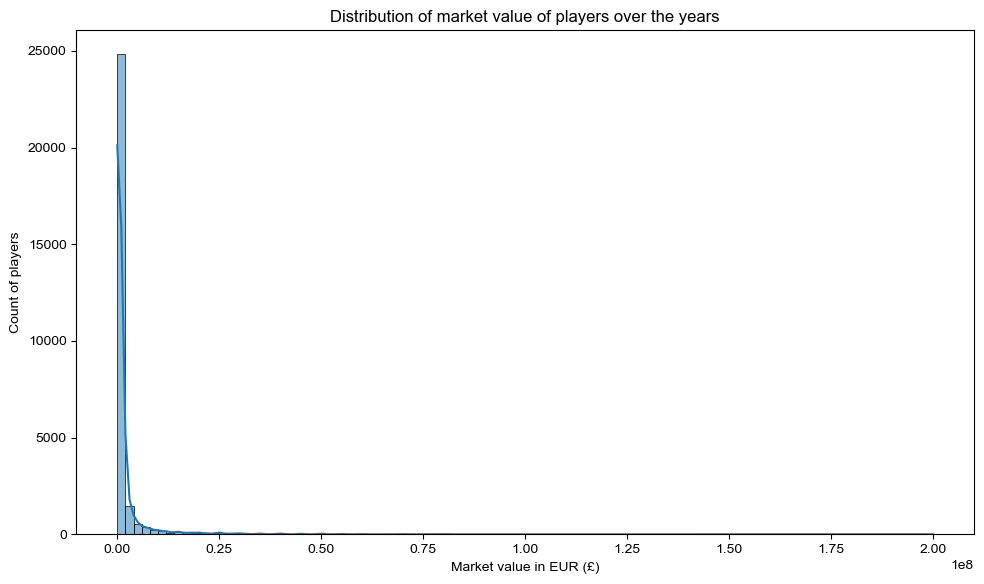

In [14]:
# plotting the distribution of market value!!
plt.figure(figsize = (10,6))
sns.histplot(df_master['market_value_in_eur_y'], bins = 100, kde = True)
sns.set_theme(palette='pastel')

plt.title('Distribution of market value of players over the years')
plt.xlabel('Market value in EUR (£)')
plt.ylabel('Count of players')
plt.tight_layout()
plt.show()

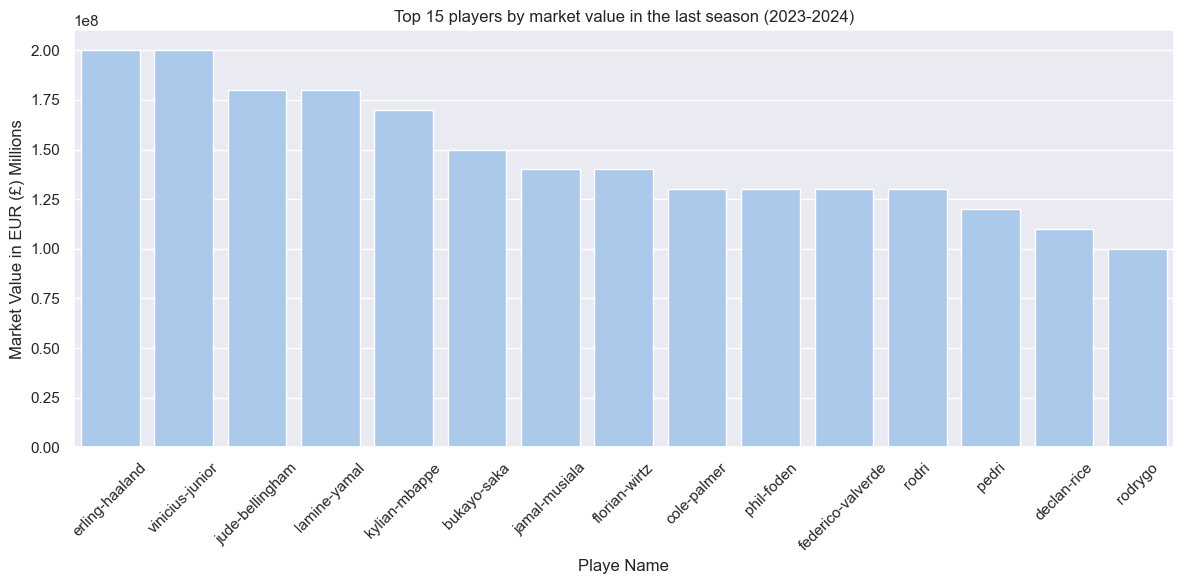

In [15]:
last_season_players = df_master[df_master['last_season'] == 2024].sort_values('market_value_in_eur_y', ascending = False).head(15)

plt.figure(figsize = (12,6))
sns.barplot(data = last_season_players, x='player_code', y='market_value_in_eur_y')
plt.xticks(rotation=45, ha='center')

plt.title('Top 15 players by market value in the last season (2023-2024)')
plt.xlabel('Playe Name')
plt.ylabel('Market Value in EUR (£) Millions')
plt.tight_layout()
plt.show()

In [16]:
df_master.to_csv('/Users/kishohars/Projects/football_valuation_project/data_clean.csv', index = False)